## Jupyter Notebook para gráfico Comparativa Tableros Finales:

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import (precision_score, recall_score, f1_score, confusion_matrix, hamming_loss)
from keras import backend as K
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick  
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

# Reseteamos la semilla:
SEED = 42  
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'


In [3]:
path = "../Datos"
datos = []
for dirnames,_,filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.xlsx'):
            datos.append(os.path.join(dirnames,filename))

print(datos)

test = pd.read_excel((datos[0]), sheet_name = 'test', header = 0)
stops = [f'stop.{i}' for i in range(1,401)] ## Para test
stops2 = [f'stop.{i}' for i in range(0,400)] # Para modelos

['../Datos\\test.xlsx', '../Datos\\train.xlsx']


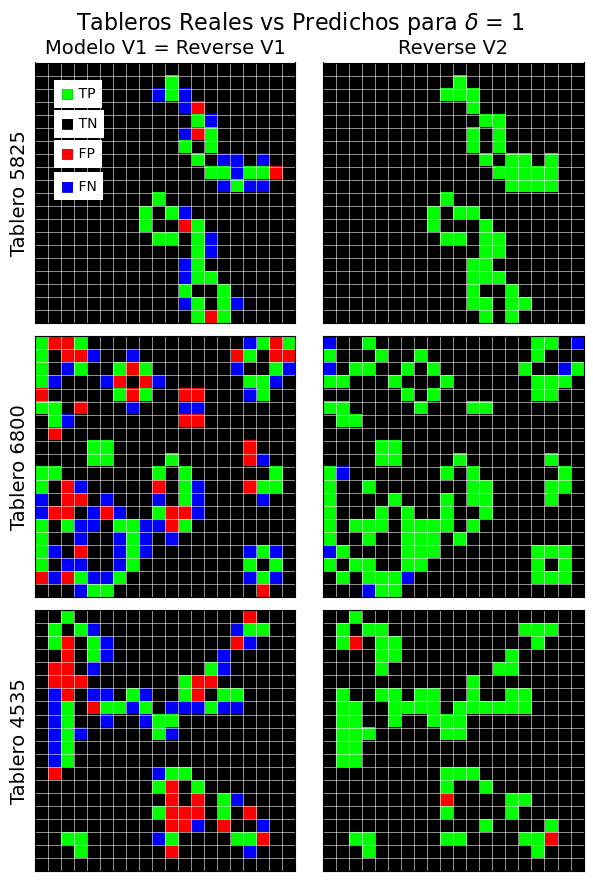

In [6]:
# ----------- Índices de los tableros que se van a comparar: -------------
# De los tableros tomados aleatoriamente en la comparativa realizada para cada modelo individualmente,
# se toman los siguientes tableros para representar las comparativa conjunta de los modelos.

delta = 1

# Obtengo los índices de los tableros que se van a comparar para esta delta:
indices = [5825, 6800, 4535]

# Filtro los datos del test asociados a esta delta:
delta_i = test[test['delta'] == delta]

# Selecciono los índices de los tableros del Test
delta_muestra = delta_i.iloc[indices]
finales_i = np.reshape(delta_muestra[stops].values, (-1, 20, 20, 1), order='F')


# ----------------- Gráficos -----------------
fig = plt.figure(figsize=(7.1, 10.5))
fig.suptitle(fr'Tableros Reales vs Predichos para $\delta$ = {delta}', fontsize=16, y= 0.93)
gs = gridspec.GridSpec(3, 2, figure=fig, hspace=0.05, wspace=0.1) # Características de cada subfigura

key = f'delta_{delta}'

# ----------------- Modelo V1 -----------------
# Leer todo el sheet del delta
df_predicciones1 = pd.read_excel('prediccionesV1.xlsx', sheet_name=key, header=0, usecols=stops2)

# Seleccionar filas específicas
df_muestra1 = df_predicciones1.iloc[indices]
    
# Pasar a NumPy
numpy_pred1 = df_muestra1.to_numpy()  # shape (10, 400)
tableros_finales_pred1 = numpy_pred1.reshape(-1, 20, 20)  # shape (10, 20, 20)

for fila in range(3):

    # Creo la subfigura:
    ax = fig.add_subplot(gs[fila, 0])

    if fila == 0:
        ax.set_title('Modelo V1 = Reverse V1', fontsize=14)

        ax.text(1.5, 2.2, '\u25A0 TP', color='black', fontsize=10, bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
        ax.text(1.5, 2.2, '\u25A0', color='lime', fontsize=10) 

        ax.text(1.5, 4.5, '\u25A0 TN', color='black', fontsize=10,
            bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'}) 
        ax.text(1.5, 4.5, '\u25A0', color='black', fontsize=10)

        ax.text(1.5, 6.8, '\u25A0 FP', color='black', fontsize=10,
            bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
        ax.text(1.5, 6.8, '\u25A0', color='red', fontsize=10)

        ax.text(1.5, 9.3, '\u25A0 FN', color='black', fontsize=10,
            bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
        ax.text(1.5, 9.3, '\u25A0', color='blue', fontsize=10)

    final1 = tableros_finales_pred1[fila]
    y_real1 = finales_i[fila]

    y_real1 = y_real1.reshape(20,20)
    y_pred1 = final1.reshape(20,20)
    comparativa1 = np.zeros((20,20,3))

    # Criterio de colores:
    comparativa1[(y_real1 == 1) & (y_pred1 == 1)] = [0,1,0] # Si coinciden, verde (TP)
    comparativa1[(y_real1 == 0) & (y_pred1 == 0)] = [0,0,0]  # Si coinciden, negro (TN)
    comparativa1[(y_real1 == 0) & (y_pred1 == 1)] = [1,0,0]  # Muerto pero vivo, rojo (FP)
    comparativa1[(y_real1 == 1) & (y_pred1 == 0)] = [0,0,1]# Vivo pero muerto, azul (FN)

    ax.imshow(comparativa1)
    ax.set_ylabel(f'Tablero {indices[fila]}', fontsize=14)

    # Añadir mallado
    ax.set_xticks(np.arange(-0.5, 20, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 20, 1), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=0.4)

    # Eliminar totalmente las etiquetas de los ticks (sin numeritos, sin marcas)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    # Quitar los ticks mayores y menores (solo deja la grid)
    ax.set_xticks([])
    ax.set_yticks([])


# ----------------- Reverse V2 -----------------
# Leer todo el sheet del delta
df_predicciones2 = pd.read_excel('prediccionesV2.xlsx', sheet_name=key, header=0, usecols=stops2)

# Seleccionar filas específicas
df_muestra2 = df_predicciones2.iloc[indices]
    
# Pasar a NumPy
numpy_pred2 = df_muestra2.to_numpy()  # shape (10, 400)
tableros_finales_pred2 = numpy_pred2.reshape(-1, 20, 20)  # shape (10, 20, 20)

for fila in range(3):

    # Creo la subfigura:
    ax = fig.add_subplot(gs[fila, 1])

    if fila == 0:
        ax.set_title('Reverse V2', fontsize=14)

    final2 = tableros_finales_pred2[fila]
    y_real2 = finales_i[fila]

    y_real2 = y_real2.reshape(20,20)
    y_pred2 = final2.reshape(20,20)
    comparativa2 = np.zeros((20,20,3))

    # Criterio de colores:
    comparativa2[(y_real2 == 1) & (y_pred2 == 1)] = [0,1,0] # Si coinciden, verde (TP)
    comparativa2[(y_real2 == 0) & (y_pred2 == 0)] = [0,0,0]  # Si coinciden, negro (TN)
    comparativa2[(y_real2 == 0) & (y_pred2 == 1)] = [1,0,0]  # Muerto pero vivo, rojo (FP)
    comparativa2[(y_real2 == 1) & (y_pred2 == 0)] = [0,0,1]# Vivo pero muerto, azul (FN)

    ax.imshow(comparativa2)
    # ax.set_ylabel(f'Tablero {indices[fila]}', fontsize=14)

    # Añadir mallado
    ax.set_xticks(np.arange(-0.5, 20, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 20, 1), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=0.4)

    # Eliminar totalmente las etiquetas de los ticks (sin numeritos, sin marcas)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    # Quitar los ticks mayores y menores (solo deja la grid)
    ax.set_xticks([])
    ax.set_yticks([])
    

fig.savefig(f'../Modelos Comparativas/comparativa_delta{delta}.png', dpi=300, bbox_inches='tight')

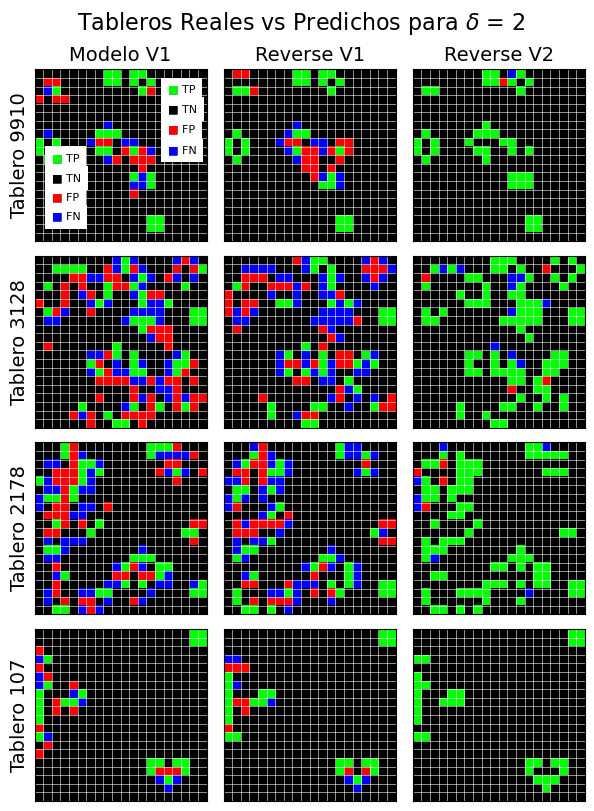

In [ ]:

# ----------- Índices de los tableros que se van a comparar: -------------
# De los tableros tomados aleatoriamente en la comparativa realizada para cada modelo individualmente,
# se toman los siguientes tableros para representar las comparativa conjunta de los modelos.

tableros_por_delta = {2: [9910, 3128, 2178, 107],
                      3: [1599, 3125, 500, 6220],
                      4: [9371, 5388, 2859, 360],
                      5: [1090, 6811, 3429, 9193]}

for delta in range(2,3): # Para cada delta necesito un gráfico.

    # Obtengo los índices de los tableros que se van a comparar para esta delta:
    indices = tableros_por_delta.get(delta)

    # Filtro los datos del test asociados a esta delta:
    delta_i = test[test['delta'] == delta]

    # Selecciono los índices de los tableros del Test
    delta_muestra = delta_i.iloc[indices]
    finales_i = np.reshape(delta_muestra[stops].values, (-1, 20, 20, 1), order='F')

    
# ----------------- Gráficos -----------------
    fig = plt.figure(figsize=(7.1, 10.5))
    fig.suptitle(fr'Tableros Reales vs Predichos para $\delta$ = {delta}', fontsize=16, y = 0.9)
    gs = gridspec.GridSpec(4, 3, figure=fig,  hspace=-0.25, wspace=0.1) # Características de cada subfigura

    key = f'delta_{delta}'

# ----------------- Modelo V1 -----------------
    # Leer todo el sheet del delta
    df_predicciones1 = pd.read_excel('prediccionesV1.xlsx', sheet_name=key, header=0, usecols=stops2)

    # Seleccionar filas específicas
    df_muestra1 = df_predicciones1.iloc[indices]
        
    # Pasar a NumPy
    numpy_pred1 = df_muestra1.to_numpy()  # shape (10, 400)
    tableros_finales_pred1 = numpy_pred1.reshape(-1, 20, 20)  # shape (10, 20, 20)

    for fila in range(4):

        # Creo la subfigura:
        ax = fig.add_subplot(gs[fila, 0])

        if fila == 0:
            ax.set_title('Modelo V1', fontsize=14)
            
            if delta in [2,5]: # Arriba Derecha
                
                ax.text(15, 2.2, '\u25A0 TP', color='black', fontsize=8, bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
                ax.text(15, 2.2, '\u25A0', color='lime', fontsize=8) 

                ax.text(15, 4.5, '\u25A0 TN', color='black', fontsize=8,
                        bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'}) 
                ax.text(15, 4.5, '\u25A0', color='black', fontsize=8)
                
                ax.text(15, 6.8, '\u25A0 FP', color='black', fontsize=8,
                        bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
                ax.text(15, 6.8, '\u25A0', color='red', fontsize=8)
            
                ax.text(15, 9.3, '\u25A0 FN', color='black', fontsize=8,
                        bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
                ax.text(15, 9.3, '\u25A0', color='blue', fontsize=8)
                

            if delta == 4: # Arriba Izquierda
                ax.text(1.5, 2.2, '\u25A0 TP', color='black', fontsize=8, bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
                ax.text(1.5, 2.2, '\u25A0', color='lime', fontsize=8) 

                ax.text(1.5, 4.5, '\u25A0 TN', color='black', fontsize=8,
                bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'}) 
                ax.text(1.5, 4.5, '\u25A0', color='black', fontsize=8)
        
                ax.text(1.5, 6.8, '\u25A0 FP', color='black', fontsize=8,
                bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
                ax.text(1.5, 6.8, '\u25A0', color='red', fontsize=8)
    
                ax.text(1.5, 9.3, '\u25A0 FN', color='black', fontsize=8,
                bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
                ax.text(1.5, 9.3, '\u25A0', color='blue', fontsize=8)
                

            if delta == 3: # Abajo Izquierda
                ax.text(1.5, 10.2, '\u25A0 TP', color='black', fontsize=8, bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
                ax.text(1.5, 10.2, '\u25A0', color='lime', fontsize=8) 

                ax.text(1.5, 12.5, '\u25A0 TN', color='black', fontsize=8,
                        bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'}) 
                ax.text(1.5, 12.5, '\u25A0', color='black', fontsize=8)
                
                ax.text(1.5, 14.8, '\u25A0 FP', color='black', fontsize=8,
                        bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
                ax.text(1.5, 14.8, '\u25A0', color='red', fontsize=8)
            
                ax.text(1.5, 17, '\u25A0 FN', color='black', fontsize=8,
                        bbox={'facecolor': 'white', 'pad': 5,'edgecolor': 'none'})
                ax.text(1.5, 17, '\u25A0', color='blue', fontsize=8)
                


        final1 = tableros_finales_pred1[fila]
        y_real1 = finales_i[fila]

        y_real1 = y_real1.reshape(20,20)
        y_pred1 = final1.reshape(20,20)
        comparativa1 = np.zeros((20,20,3))

        # Criterio de colores:
        comparativa1[(y_real1 == 1) & (y_pred1 == 1)] = [0,1,0] # Si coinciden, verde (TP)
        comparativa1[(y_real1 == 0) & (y_pred1 == 0)] = [0,0,0]  # Si coinciden, negro (TN)
        comparativa1[(y_real1 == 0) & (y_pred1 == 1)] = [1,0,0]  # Muerto pero vivo, rojo (FP)
        comparativa1[(y_real1 == 1) & (y_pred1 == 0)] = [0,0,1]# Vivo pero muerto, azul (FN)

        ax.imshow(comparativa1)
        ax.set_ylabel(f'Tablero {indices[fila]}', fontsize=14)

        # Añadir mallado
        ax.set_xticks(np.arange(-0.5, 20, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, 20, 1), minor=True)
        ax.grid(which='minor', color='white', linestyle='-', linewidth=0.4)

        # Eliminar totalmente las etiquetas de los ticks (sin numeritos, sin marcas)
        ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        # Quitar los ticks mayores y menores (solo deja la grid)
        ax.set_xticks([])
        ax.set_yticks([])

    # ----------------- Reverse V1 -----------------
    # Leer todo el sheet del delta
    df_prediccionesR1 = pd.read_excel('prediccionesV1_Reverse.xlsx', sheet_name=key, header=0, usecols=stops2)

    # Seleccionar filas específicas
    df_muestraR1 = df_prediccionesR1.iloc[indices]
        
    # Pasar a NumPy
    numpy_predR1 = df_muestraR1.to_numpy()  # shape (10, 400)
    tableros_finales_predR1 = numpy_predR1.reshape(-1, 20, 20)  # shape (10, 20, 20)

    for fila in range(4):

        # Creo la subfigura:
        ax = fig.add_subplot(gs[fila, 1])

        if fila == 0:
            ax.set_title('Reverse V1', fontsize=14)
            
        finalR1 = tableros_finales_predR1[fila]
        y_realR1 = finales_i[fila]

        y_realR1 = y_realR1.reshape(20,20)
        y_predR1 = finalR1.reshape(20,20)
        comparativaR1 = np.zeros((20,20,3))

        # Criterio de colores:
        comparativaR1[(y_realR1 == 1) & (y_predR1 == 1)] = [0,1,0] # Si coinciden, verde (TP)
        comparativaR1[(y_realR1 == 0) & (y_predR1 == 0)] = [0,0,0]  # Si coinciden, negro (TN)
        comparativaR1[(y_realR1 == 0) & (y_predR1 == 1)] = [1,0,0]  # Muerto pero vivo, rojo (FP)
        comparativaR1[(y_realR1 == 1) & (y_predR1 == 0)] = [0,0,1]# Vivo pero muerto, azul (FN)

        ax.imshow(comparativaR1)
        # ax.set_ylabel(f'Tablero {indices[fila]}', fontsize=14)

        # Añadir mallado
        ax.set_xticks(np.arange(-0.5, 20, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, 20, 1), minor=True)
        ax.grid(which='minor', color='white', linestyle='-', linewidth=0.4)

        # Eliminar totalmente las etiquetas de los ticks (sin numeritos, sin marcas)
        ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        # Quitar los ticks mayores y menores (solo deja la grid)
        ax.set_xticks([])
        ax.set_yticks([])
       

       # ----------------- Reverse V2 -----------------
    # Leer todo el sheet del delta
    df_predicciones2 = pd.read_excel('prediccionesV2.xlsx', sheet_name=key, header=0, usecols=stops2)

    # Seleccionar filas específicas
    df_muestra2 = df_predicciones2.iloc[indices]
        
    # Pasar a NumPy
    numpy_pred2 = df_muestra2.to_numpy()  # shape (10, 400)
    tableros_finales_pred2 = numpy_pred2.reshape(-1, 20, 20)  # shape (10, 20, 20)

    for fila in range(4):

        # Creo la subfigura:
        ax = fig.add_subplot(gs[fila, 2])

        if fila == 0:
            ax.set_title('Reverse V2', fontsize=14)

        final2 = tableros_finales_pred2[fila]
        y_real2 = finales_i[fila]

        y_real2 = y_real2.reshape(20,20)
        y_pred2 = final2.reshape(20,20)
        comparativa2 = np.zeros((20,20,3))

        # Criterio de colores:
        comparativa2[(y_real2 == 1) & (y_pred2 == 1)] = [0,1,0] # Si coinciden, verde (TP)
        comparativa2[(y_real2 == 0) & (y_pred2 == 0)] = [0,0,0]  # Si coinciden, negro (TN)
        comparativa2[(y_real2 == 0) & (y_pred2 == 1)] = [1,0,0]  # Muerto pero vivo, rojo (FP)
        comparativa2[(y_real2 == 1) & (y_pred2 == 0)] = [0,0,1]# Vivo pero muerto, azul (FN)

        ax.imshow(comparativa2)
        # ax.set_ylabel(f'Tablero {indices[fila]}', fontsize=14)

        # Añadir mallado
        ax.set_xticks(np.arange(-0.5, 20, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, 20, 1), minor=True)
        ax.grid(which='minor', color='white', linestyle='-', linewidth=0.4)

        # Eliminar totalmente las etiquetas de los ticks (sin numeritos, sin marcas)
        ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        # Quitar los ticks mayores y menores (solo deja la grid)
        ax.set_xticks([])
        ax.set_yticks([])
       

    fig.savefig(f'../Modelos Comparativas/comparativa_delta{delta}.png', dpi=300, bbox_inches='tight')